# **Enhancement by Spatial Filtering**

In [193]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt
import urllib

In [194]:
req = urllib.request.urlopen('https://github.com/AthimetA/FRA321/blob/main/img/red.jpg?raw=true')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
img = cv2.imdecode(arr, -1) 

## **Create Kernel**

In [195]:
kernal_size = 15

### Averaging Kernel

In [196]:
AvgKernel = np.ones((kernal_size,kernal_size),np.float32)/(kernal_size*kernal_size)

### Gaussian Kernel

In [197]:
GaussianKernel = cv2.getGaussianKernel(kernal_size,0)

### Laplacian Kernel

In [198]:
LaplacianKernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])

### Sobel Kernel

In [199]:
SobelKernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

### Prewitt Kernel

In [200]:
PreWittKernel = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

### Roberts Kernel

In [201]:
RobertsKernel = np.array([[-1,0],[0,1]])

### Canny Kernel

In [202]:
CannyKernel = np.array([[1,1,1],[1,-8,1],[1,1,1]])

## **Filter Example**

### Low-Pass Filter

#### Averaging Filter

In [ ]:
img_dst = cv2.filter2D(img,-1,AvgKernel)
#OR 
img_blur = cv2.blur(img,(kernal_size,kernal_size))

#### Gaussian Filter

In [ ]:
img_gaussian = cv2.GaussianBlur(img,(kernal_size,kernal_size),0)

### Median Filter

In [206]:
img_median = cv2.medianBlur(img,kernal_size)

### Bilateral Filter

In [207]:
img_bilateral = cv2.bilateralFilter(img,9,75,75)

### Laplacian Filter

In [208]:
img_lap = cv2.Laplacian(img,cv2.CV_64F)

### Sobel Filter

In [209]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=kernal_size)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=kernal_size)

## **Plotting**

In [210]:
def plot_images(images, titles, rows, cols , info = -1):
    fig = plt.figure(figsize=(20, 10))
    for i in range(rows * cols):
        ax = fig.add_subplot(rows, cols, i + 1)
        if info != -1:
            ax.text(0.5, 0.5, info[i], fontsize=10, color='black', ha='left', va='top')
        ax.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        ax.set_title(titles[i])
        ax.axis('off')
    plt.show()

In [211]:
title = ['Original','Avg','Gaussian','Blur','Median','Bilateral','Laplacian']
images = [img,img_dst,img_gaussian,img_blur,img_median,img_bilateral,img_lap]

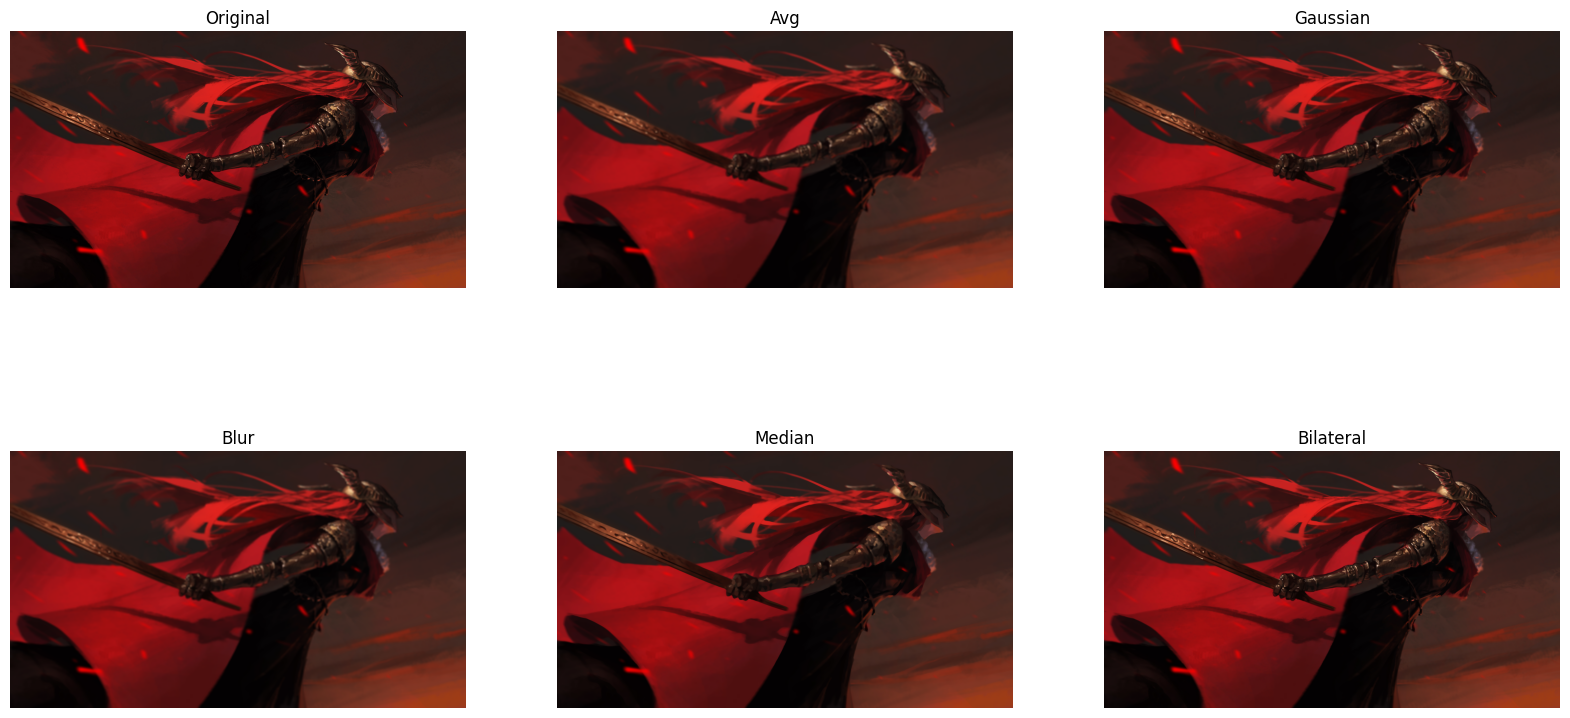

In [212]:
plot_images(images,title,2,3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


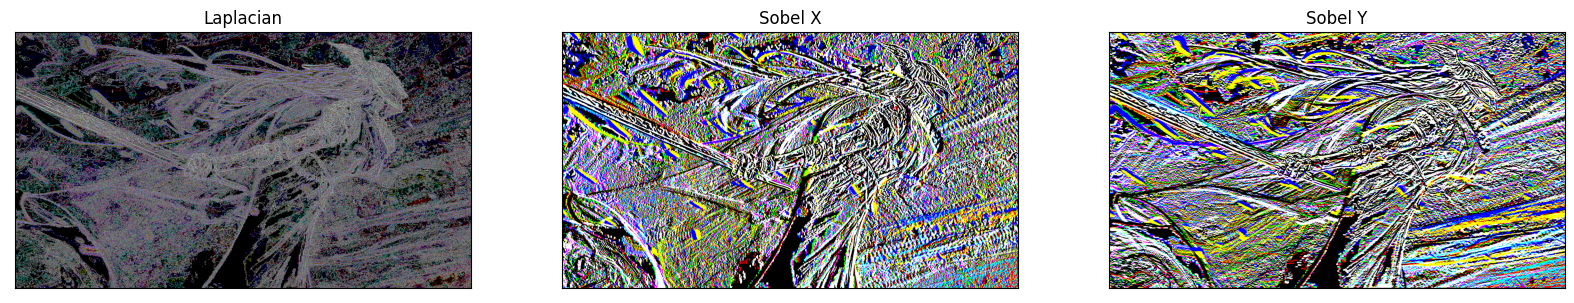

In [213]:
plt.figure(figsize=(20, 10))
plt.subplot(131),plt.imshow(img_lap,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()